# Making plot for Castro et al paper --> showing FCGR genes in the atlas

In [1]:
#load packages I need
import os
import tools
import scanpy as sc
import pandas as pd
import dandelion as ddl
from tqdm import tqdm
import matplotlib.pyplot as plt
import scanpy.external as sce
from matplotlib.pyplot import rc_context
import seaborn as sns

In [2]:
#show current directory 
os.getcwd()
os.chdir('/scratch/user/s4436039/scdata/Myeloid_Objects')
os.getcwd()

'/scratch/user/s4436039/scdata/Myeloid_Objects'

In [3]:
sc.logging.print_header()

scanpy==1.10.2 anndata==0.10.8 umap==0.5.6 numpy==1.26.4 scipy==1.14.0 pandas==2.2.2 scikit-learn==1.5.0 statsmodels==0.14.2 igraph==0.11.5 pynndescent==0.5.12


In [4]:
# read in data
data = sc.read_h5ad('NRclean_clustered2.h5ad')

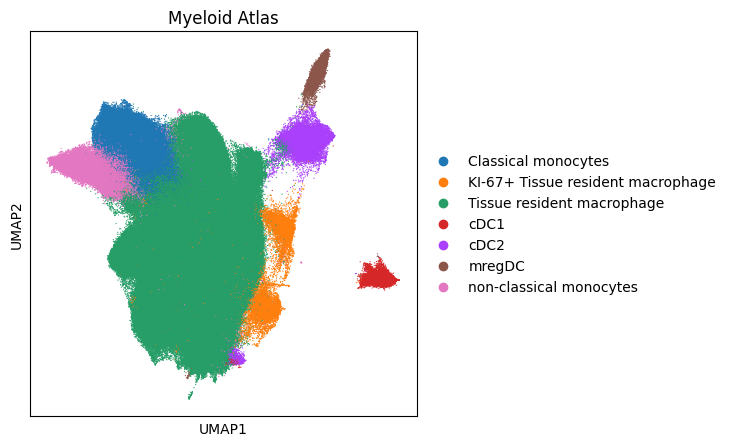

In [5]:
with plt.rc_context({"figure.figsize": (5, 5)}):
    sc.pl.umap(data, color="NR_annotations_simple", size=3, title="Myeloid Atlas")

In [6]:
dot_vars = ["FCGR1A","FCGR1B","FCGR2A","FCGR2B","FCGR3A","FCGR3B"]

In [7]:
data_P = data[data.obs["sample_type_major2"].isin(["primary tumour"])]
data_M = data[data.obs["sample_type_major2"].isin(["metastatic tumour"])]
data_H = data[data.obs["sample_type_major2"].isin(["healthy"])]

In [8]:
data_P_DC1 = data_P[data_P.obs["NR_annotations_simple"].isin(["cDC1"])]
data_P_DC2 = data_P[data_P.obs["NR_annotations_simple"].isin(["cDC2"])]
data_P_mregDC = data_P[data_P.obs["NR_annotations_simple"].isin(["mregDC"])]
data_P_mono = data_P[data_P.obs["NR_annotations_simple"].isin(["Classical monocytes"])]

data_M_DC1 = data_M[data_M.obs["NR_annotations_simple"].isin(["cDC1"])]
data_M_DC2 = data_M[data_M.obs["NR_annotations_simple"].isin(["cDC2"])]
data_M_mregDC = data_M[data_M.obs["NR_annotations_simple"].isin(["mregDC"])]
data_M_mono = data_M[data_M.obs["NR_annotations_simple"].isin(["Classical monocytes"])]

data_H_DC1 = data_H[data_H.obs["NR_annotations_simple"].isin(["cDC1"])]
data_H_DC2 = data_H[data_H.obs["NR_annotations_simple"].isin(["cDC2"])]
data_H_mregDC = data_H[data_H.obs["NR_annotations_simple"].isin(["mregDC"])]
data_H_mono = data_H[data_H.obs["NR_annotations_simple"].isin(["Classical monocytes"])]

In [9]:
# Set directory for saving plots
sc.settings.figdir = "Castro_dotplots_svg3"
sc.settings.dpi = 600

In [10]:
data.var.index.isin(dot_vars)

array([False, False, False, ..., False, False, False])

In [11]:
from tqdm import tqdm
data2 = data.raw.to_adata()
data2.var["keep"] = False
for i in tqdm(data2.var.index):
    if i in dot_vars:
        data2.var.loc[i, "keep"] = True

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15074/15074 [00:00<00:00, 3795925.70it/s]


In [12]:
data2.var.keep.value_counts()

keep
False    15068
True         6
Name: count, dtype: int64

In [13]:
import numpy as np
np.max(data2.X)

8.941265918373597

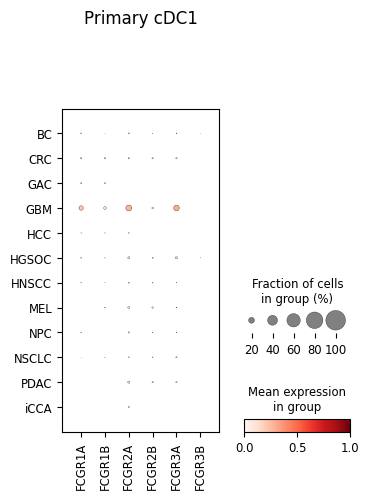

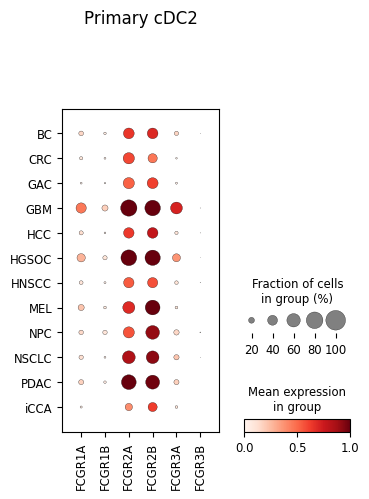

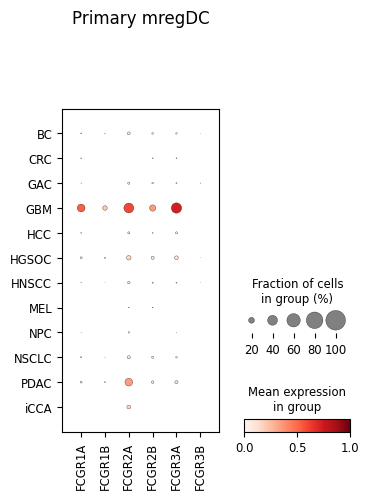

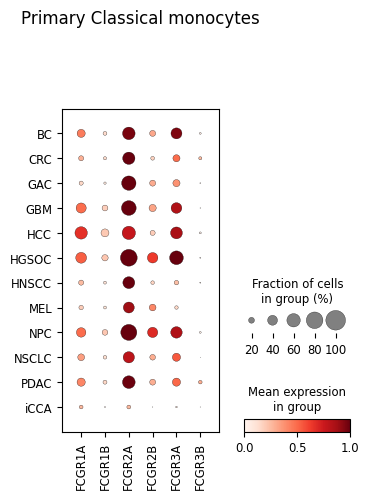

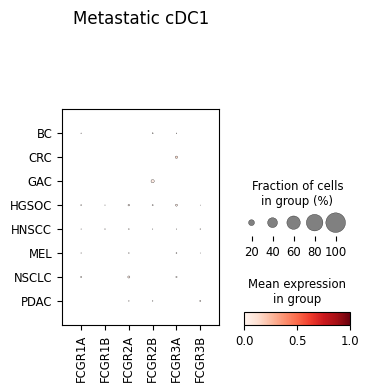

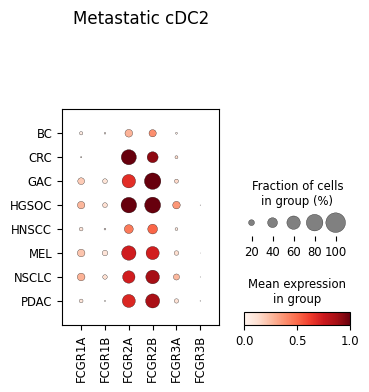

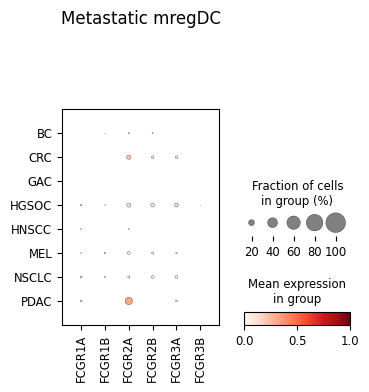

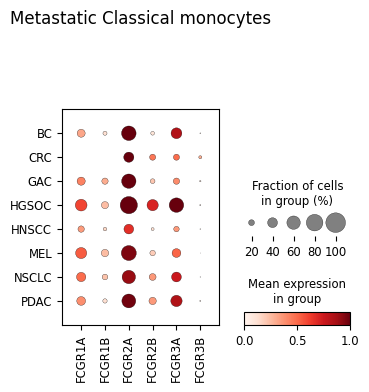

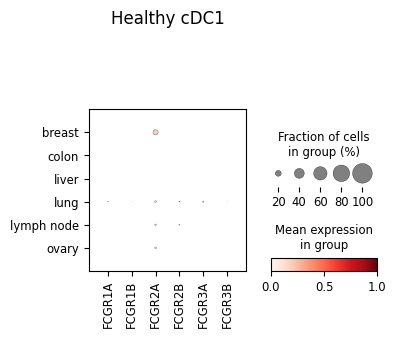

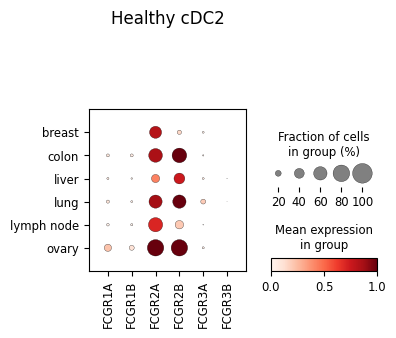

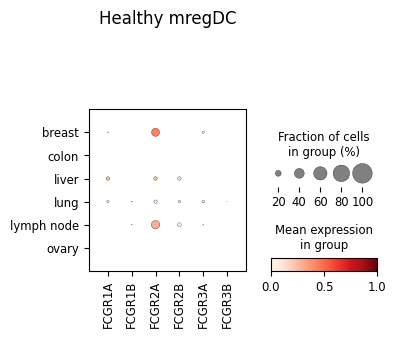

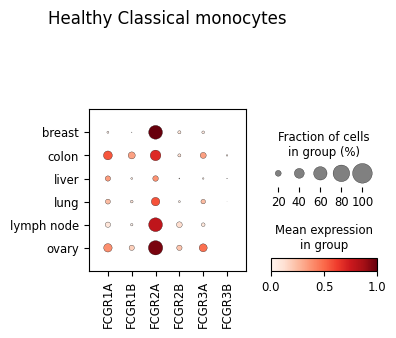

In [ ]:
sc.pl.dotplot(data_P_DC1, dot_vars, groupby="cancer_broadest", title="Primary cDC1", dot_min=0.0, dot_max=1.0, vmin=0, vmax=1, save="_Primary_cDC1.svg")
sc.pl.dotplot(data_P_DC2, dot_vars, groupby="cancer_broadest", title="Primary cDC2", dot_min=0.0, dot_max=1.0, vmin=0, vmax=1, save="_Primary_cDC2.svg")
sc.pl.dotplot(data_P_mregDC, dot_vars, groupby="cancer_broadest", title="Primary mregDC", dot_min=0.0, dot_max=1.0, vmin=0, vmax=1, save="_Primary_mregDC.svg")
sc.pl.dotplot(data_P_mono, dot_vars, groupby="cancer_broadest", title="Primary Classical monocytes", dot_min=0.0, dot_max=1.0, vmin=0, vmax=1, save="_Primary_mono.svg")

sc.pl.dotplot(data_M_DC1, dot_vars, groupby="cancer_broadest", title="Metastatic cDC1", dot_min=0.0, dot_max=1.0, vmin=0, vmax=1, save="_Mets_cDC1.svg")
sc.pl.dotplot(data_M_DC2, dot_vars, groupby="cancer_broadest", title="Metastatic cDC2", dot_min=0.0, dot_max=1.0, vmin=0, vmax=1, save="_Mets_cDC2.svg")
sc.pl.dotplot(data_M_mregDC, dot_vars, groupby="cancer_broadest", title="Metastatic mregDC", dot_min=0.0, dot_max=1.0, vmin=0, vmax=1, save="_Mets_mregDC.svg")
sc.pl.dotplot(data_M_mono, dot_vars, groupby="cancer_broadest", title="Metastatic Classical monocytes", dot_min=0.0, dot_max=1.0, vmin=0, vmax=1, save="_Mets_mono.svg")

sc.pl.dotplot(data_H_DC1, dot_vars, groupby="site", title="Healthy cDC1", dot_min=0.0, dot_max=1.0, vmin=0, vmax=1, save="_Healthy_cDC1.svg")
sc.pl.dotplot(data_H_DC2, dot_vars, groupby="site", title="Healthy cDC2", dot_min=0.0, dot_max=1.0, vmin=0, vmax=1, save="_Healthy_cDC2.svg")
sc.pl.dotplot(data_H_mregDC, dot_vars, groupby="site", title="Healthy mregDC", dot_min=0.0, dot_max=1.0, vmin=0, vmax=1, save="_Healthy_mregDC.svg")
sc.pl.dotplot(data_H_mono, dot_vars, groupby="site", title="Healthy Classical monocytes", dot_min=0.0, dot_max=1.0, vmin=0, vmax=1, save="_Healthy_mono.svg")

## Export dotplot values

In [23]:
expr = data_P_DC1.raw[:, dot_vars].to_adata().to_df()
groups = data_P_DC1.obs["cancer_broadest"]

pd.concat(
    {
        "mean_expression": expr.groupby(groups).mean().T,
        "fraction_expressing": (expr > 0).groupby(groups).mean().T,
    },
    axis=1,
).to_csv("Castro_Primary_cDC1_dotplot_values.csv")

/scratch/temp/20650103/ipykernel_2716446/34000549.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/scratch/temp/20650103/ipykernel_2716446/34000549.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


In [24]:
expr = data_P_DC2.raw[:, dot_vars].to_adata().to_df()
groups = data_P_DC2.obs["cancer_broadest"]

pd.concat(
    {
        "mean_expression": expr.groupby(groups).mean().T,
        "fraction_expressing": (expr > 0).groupby(groups).mean().T,
    },
    axis=1,
).to_csv("Castro_Primary_cDC2_dotplot_values.csv")

/scratch/temp/20650103/ipykernel_2716446/2024504813.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/scratch/temp/20650103/ipykernel_2716446/2024504813.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


In [25]:
expr = data_P_mono.raw[:, dot_vars].to_adata().to_df()
groups = data_P_mono.obs["cancer_broadest"]

pd.concat(
    {
        "mean_expression": expr.groupby(groups).mean().T,
        "fraction_expressing": (expr > 0).groupby(groups).mean().T,
    },
    axis=1,
).to_csv("Castro_Primary_cMono_dotplot_values.csv")

/scratch/temp/20650103/ipykernel_2716446/3986936020.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/scratch/temp/20650103/ipykernel_2716446/3986936020.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
